# Computer Vision Assignments: Sessions 1 & 2

This notebook contains tasks and assignments based on Sessions 1 and 2. You are required to implement the functions and complete the exercises as described. Use OpenCV and other necessary libraries like NumPy and Matplotlib.

**Instructions:**
- Complete each task in the provided code cells.
- Test your implementations with sample images (e.g., download test images [here](https://sipi.usc.edu/database/database.php?volume=misc) or [here](https://www.hlevkin.com/hlevkin/06testimages.htm) or use your own test images).
- Include comments in your code for clarity.
- Display results using cv2.imshow() or Matplotlib where appropriate.
- Submit the completed notebook along with any output images or explanations on [our google drive for the CV sessions](https://drive.google.com/drive/folders/1IjVhJmAXxNQTGT-ybJ-yc5smYtR5v8CO?usp=sharing) **upload your files in a new folder under your name**

## Session 1: Basic Image Operations (Reading, Resizing, Cropping, Rotating)

### Task 1: Read and Display an Image
Read an image from a file and display it in both BGR and grayscale formats. Handle errors if the image cannot be read.

In [4]:

import cv2 as cv
import numpy as np
import sys



# Your code here
path1 = r'C:\Users\nourw\Desktop\SKY\Session1-20250906T073155Z-1-001\Session1\images\dog.jpg'  # Replace with your image path
path2=r'C:\Users\nourw\Desktop\SKY\Session1-20250906T073155Z-1-001\Session1\images\dogBGR.jpg'
# Read in BGR
bgr_img = cv.imread(path2, cv.IMREAD_COLOR)

# Read in Grayscale
gray_img = cv.imread(path1, cv.IMREAD_GRAYSCALE)

# Display both using cv.imshow() or plt.imshow()
cv.imshow("Dog image ", bgr_img) 
k = cv.waitKey(0)
cv.imshow("Dog image ", gray_img) 
k = cv.waitKey(0) 
cv.destroyAllWindows()

### Task 2: Resize Image with Aspect Ratio Preservation
Implement resizing while preserving aspect ratio. Downscale to 60% and upscale to 200%. Compare shapes and display originals vs resized.

In [39]:
# Your code here
# Load image

image = cv.imread(r'C:\Users\nourw\Desktop\SKY\Session1-20250906T073155Z-1-001\Session1\images\dog.jpg')
# Downscale to 60%

Scale_percent = 60

h,w , _ = image.shape 

h = int(Scale_percent *h / 100)
w = int(Scale_percent * w / 100 )
dim = (h,w)
down_img = cv.resize(image, dim , interpolation = cv.INTER_AREA)

# Upscale to 200%
Scale_percent = 200

h,w , _ = image.shape 

h = int(Scale_percent *h / 100)
w = int(Scale_percent * w / 100 )
dim = (h,w)
up_img = cv.resize(image, dim , interpolation = cv.INTER_LINEAR)

# Display all three
cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("Down Scaled image ", down_img)
cv.waitKey(0)
cv.imshow("up Scaled image ", up_img)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 3: Resize Without Preserving Aspect Ratio
Resize only width to 100 pixels, only height to 200 pixels, and both to (200, 200). Display and discuss distortions.

In [40]:
# Your code here
h,w , _ = image.shape
h = h
w = 100
dim = (h,w)
Width_img = cv.resize(image, dim , interpolation = cv.INTER_AREA)

h,w , _ = image.shape
h = 200
w = w
dim = (h,w)
height_img = cv.resize(image, dim , interpolation = cv.INTER_AREA)

h,w , _ = image.shape
h = 200
w = 200
dim = (h,w)
both_img = cv.resize(image, dim , interpolation = cv.INTER_AREA)

cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow(" width image ", Width_img)
cv.waitKey(0)
cv.imshow("height image ", height_img)
cv.waitKey(0)
cv.imshow("both image ", both_img)
cv.waitKey(0)
cv.destroyAllWindows()


### Task 4: Resize Using Scale Factors (fx, fy)
Scale up by 1.2 in both directions and down by 0.6. Use different interpolations (INTER_LINEAR, INTER_NEAREST) and compare quality.

In [44]:
# Your code here
# Experiment with interpolations
scale_up_x = 3
scale_up_y = 3
scale_down = 0.6

scaled_f_down = cv.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv.INTER_LINEAR)
scaled_f_up = cv.resize(image, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv.INTER_LINEAR)

cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("scale up ", scaled_f_up)
cv.waitKey(0)
cv.imshow("scale down ", scaled_f_down)
cv.waitKey(0)
cv.destroyAllWindows()

In [45]:
scaled_f_down = cv.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv.INTER_NEAREST)
scaled_up = cv.resize(image, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv.INTER_NEAREST)

cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("scale up ", scaled_f_up)
cv.waitKey(0)
cv.imshow("scale down ", scaled_f_down)
cv.waitKey(0)
cv.destroyAllWindows()



In [46]:
import numpy as np

def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

mse_score = mse(scaled_f_up,scaled_up)
print(f"MSE Score (Original vs. Scaled Up): {mse_score:.2f}")

MSE Score (Original vs. Scaled Up): 11.09


### Task 5: Cropping an Image
Crop a region (e.g., [20:200, 50:200]) from the image. Display original and cropped.

In [47]:
# Your code here
Cropped_img = image [20:200 , 50:200] #[vertical(row),horizontal(column)]
cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("Cropped img ", Cropped_img)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 6: Advanced Cropping - Patch Image into Blocks
Divide the image into 4 equal blocks (2x2 grid) by cropping. Display each block separately and then stitch them back using NumPy concatenation to verify.

In [5]:
# Your code here
path1 = r'C:\Users\nourw\Desktop\SKY\Session1-20250906T073155Z-1-001\Session1\images\dog.jpg'
image=cv.imread(path1)
h, w = image.shape[:2]
# Calculate midpoints for height and width
mid_x = w // 2
mid_y = h // 2
# Top-left
top_left = image[0:mid_y, 0:mid_x]   
top_right = image[0:mid_y, mid_x:w]
bottom_left = image[mid_y:h, 0:mid_x]
bottom_right = image[mid_y:h, mid_x:w]


cv.imshow('Top Left', top_left)
cv.imshow('Top Right', top_right)
cv.imshow('Bottom Left', bottom_left)
cv.imshow('Bottom Right', bottom_right)



# Stitch back (use np.hstack and np.vstack)

top_row = np.hstack((top_left, top_right))      # Horizontal concat
bottom_row = np.hstack((bottom_left, bottom_right))
reconstructed = np.vstack((top_row, bottom_row)) # Vertical concat

# Display reconstructed image
cv.imshow("Reconstructed Image", reconstructed)

cv.waitKey(0)
cv.destroyAllWindows()


### Task 7: Rotating an Image
Rotate the image by 45°, 90°, and 180° using getRotationMatrix2D and warpAffine. Display all rotations.

In [10]:
# Your code here
# Calculate center
height, width , _= image.shape
center = (width/2, height/2)
# For each angle: get matrix, warp, display
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=45, scale=1)
rotated_image = cv.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
print(image.shape)
print(rotated_image.shape)
cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("Rotated image 45 ", rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

rotate_matrix = cv.getRotationMatrix2D(center=center, angle=90, scale=1)
rotated_image = cv.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
print(image.shape)
print(rotated_image.shape)
cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("Rotated image 90 ", rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

rotate_matrix = cv.getRotationMatrix2D(center=center, angle=180, scale=1)
rotated_image = cv.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
print(image.shape)
print(rotated_image.shape)
cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("Rotated image 180", rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()


(300, 332, 3)
(300, 332, 3)
(300, 332, 3)
(300, 332, 3)
(300, 332, 3)
(300, 332, 3)


### Task 8: Rotate with Scaling
Rotate by 45° and scale by 0.5 in **one** operation. Compare with separate resize and rotate.

In [11]:

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
angle = 45
scale = 0.5
M = cv.getRotationMatrix2D(center, angle, scale)

# Apply transformation
rotated_scaled = cv.warpAffine(image, M, (w, h))
cv.imshow("Orignal", image)
cv.waitKey(0)
cv.imshow("Rotated", rotated_scaled)
cv.waitKey(0)
cv.destroyAllWindows()


## Session 2: Image Acquisition, Formats, Color Spaces, Enhancement, and Filtering

### Task 9: Read Image in Different Color Spaces
Read an image in BGR, convert to RGB (for Matplotlib), HSV, LAB and Grayscale. Display all.

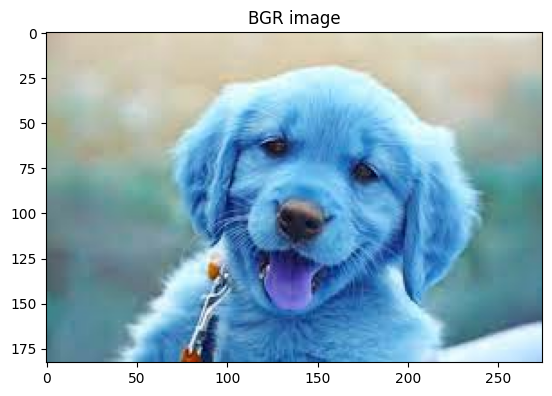

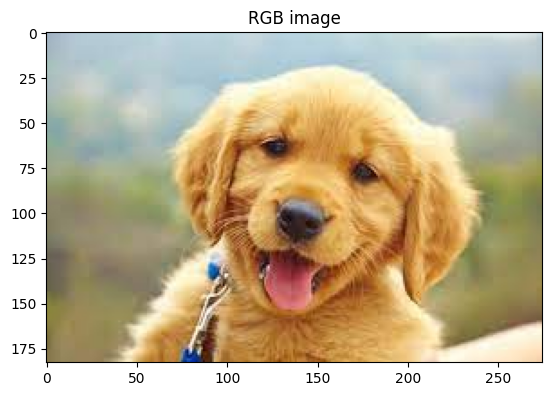

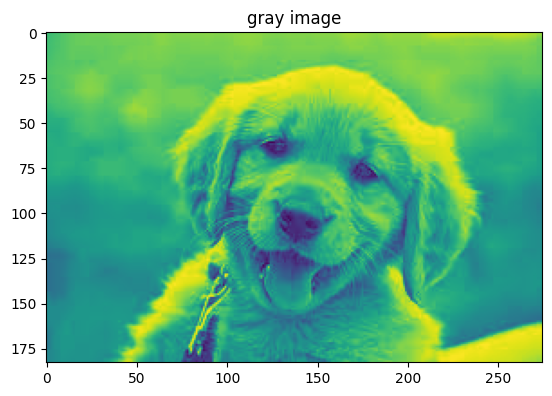

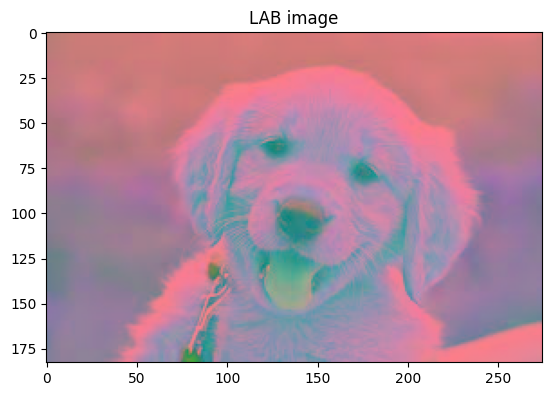

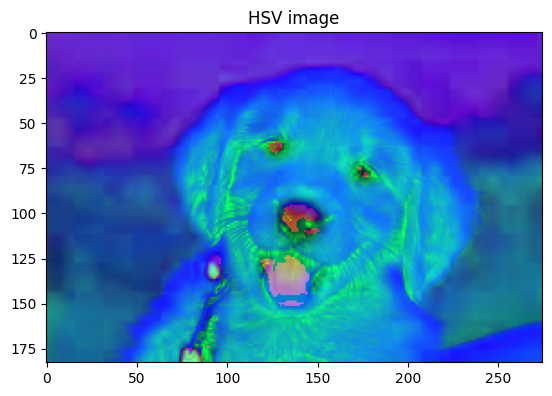

In [25]:
# Your code here
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np
import sys
%matplotlib inline
# Use cv.cvtColor()
path = r'C:\Users\nourw\Desktop\SKY\Session2-20250907T225702Z-1-001\Session2\images\dogBGR.jpg'
image_BGR = cv.imread(path)

image_rgb = cv.cvtColor(image_BGR, cv.COLOR_BGR2RGB)

grayimage = cv.cvtColor(image_BGR, cv.COLOR_BGR2GRAY)

LAB_img = cv.cvtColor(image_BGR,cv.COLOR_BGR2LAB)

HSV_img = cv.cvtColor(image_BGR,cv.COLOR_BGR2HSV)

plt.imshow(image_BGR)
plt.title("BGR image")
plt.show()

plt.imshow(image_rgb)
plt.title("RGB image")
plt.show()

plt.imshow(grayimage)
plt.title("gray image")
plt.show()

plt.imshow(LAB_img)
plt.title("LAB image")
plt.show()

plt.imshow(HSV_img)
plt.title("HSV image")
plt.show()

### Task 10: Image Sharpening
Apply cv2.blur() with a 5x5 kernel, then use cv2.filter2D() with sharpening kernels of varying strengths (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] and [[0, -2, 0], [-2, 9, -2], [0, -2, 0]]).
Compare between original and sharpened image after blurring.

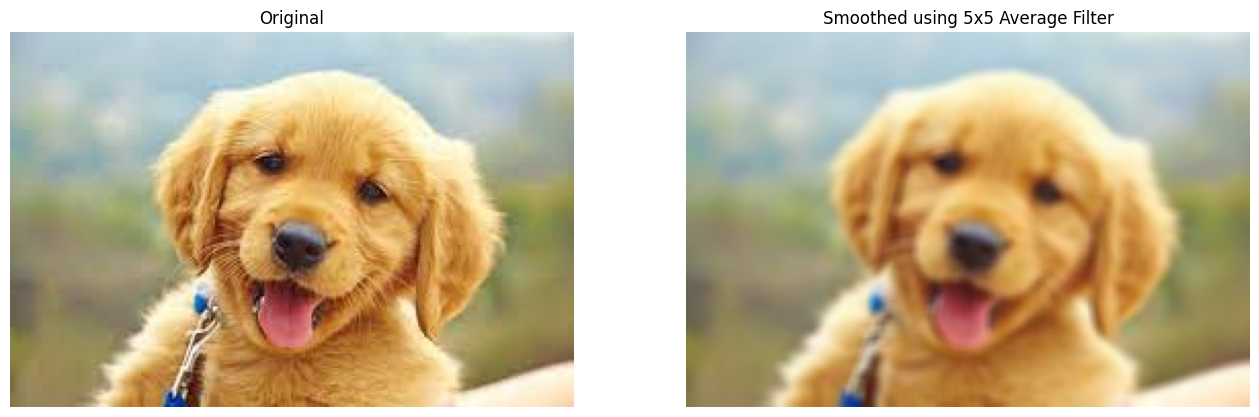

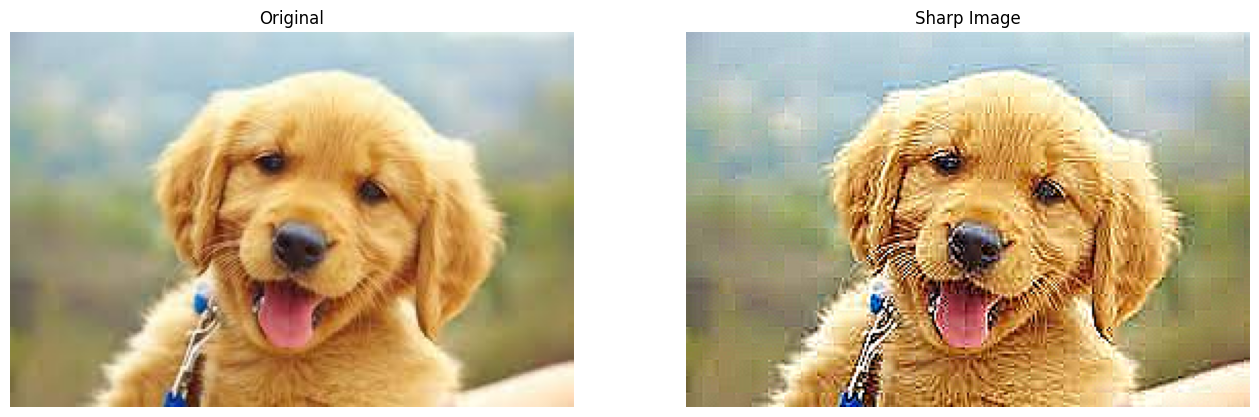

In [26]:
# Your code here
def pair_plot(img1, img2, title1="Original", title2="Filtered"):
    fig = plt.figure(figsize=(16, 16))
    fig.add_subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")
    fig.add_subplot(1,2,2)
    plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")

# Use cv2.blur   
blurimag = cv.blur(image_rgb ,ksize = (5,5))
pair_plot(image_rgb, blurimag, title1="Original", title2="Smoothed using 5x5 Average Filter")

# Define sharpen kernel, use cv.filter2D()
sharpen_filter = np.array([[0,-1, 0],
                          [-1, 5,-1],
                          [0,-1, 0]])
sharpImg = cv.filter2D(image_rgb, -1, sharpen_filter)
pair_plot(image_rgb, sharpImg, 'Original', 'Sharp Image')

### Task 11: Add Salt and Pepper Noise to Image
Implement a function to add salt and pepper noise to an image. Control noise density (e.g., 0.05).

In [ ]:
from skimage.util import random_noise
import numpy as np

# Your code here
def add_salt_pepper_noise(image, density=0.05):


# Apply to an image and display

_IncompleteInputError: incomplete input (2621462298.py, line 9)

### Task 12: Remove Salt and Pepper Noise Using Median Filter
Apply cv.medianBlur() to a noisy image. Experiment with kernel sizes (3,5,7) and compare results.

In [ ]:
# Your code here
# Apply a Median Filter to remove the noise


### Task 13: Implement Adaptive Median Filter
Write a custom function for adaptive median filtering. It should dynamically increase window size until noise is removed or max size is reached. Apply to a noisy image and compare with standard median.

In [ ]:
# Your code here
def adaptive_median_filter(image, max_size=7):
    # Implement logic: for each pixel, start with small window, increase if needed
    pass

# Test on noisy image

### Task 14: Implement Bilateral Filter Function
Write a Python function to perform bilateral filtering on an image. Use Gaussian weights for both spatial and intensity. Parameters: diameter, sigma_color, sigma_space. Compare with cv.bilateralFilter().

In [ ]:
# Your code here
def custom_bilateral_filter(image, diameter, sigma_color, sigma_space):
    # Implement using nested loops or vectorized (efficiently)
    # For each pixel, compute weighted sum based on distance and intensity diff
    pass

# Apply to image, display, and compare with OpenCV's version

### [BONUS] Task 15: Comprehensive Camera Task 
Combine: Live camera feed -> grayscale -> add noise -> remove with median -> sharpen. Display all stages in separate windows.

In [ ]:
# To read video from camera example:

camera_id = 0
delay = 400
window_name = 'frame'

cap = cv.VideoCapture(camera_id)

if not cap.isOpened():
    sys.exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    cv.imshow(window_name, frame)
    if cv.waitKey(delay) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyWindow(window_name)


# Your code here

### [BONUS]Task 16: Comprehensive Video Task
Similar to Task 18 but for a video file. Save the final processed video.

In [ ]:
# Your code here

### Task 17: Performance Comparison
Time the execution of standard median vs adaptive median on a large noisy image. Discuss when adaptive median filter is better.

In [ ]:
import time
# Your code here
# Use time.time() to measure